# Importing required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [2]:
car = pd.read_csv('Car_details_v3.csv', index_col=[0])

In [3]:
car

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
name,,,,,,,,,,,,
Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0


In [4]:
car.shape

(8128, 12)

# Checking informations

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8128 entries, Maruti Swift Dzire VDI to Tata Indigo CR4
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   object 
 8   engine         7907 non-null   object 
 9   max_power      7913 non-null   object 
 10  torque         7906 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 825.5+ KB


## There are null values in the attribute 'mileage', 'engine', 'max power', 'torque' , 'seats'

In [6]:
car.isnull().any()

year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

In [7]:
car.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

## percentage of missing values w.r.t the dataframe car_details

In [8]:
car.isnull().sum()/len(car) *100

year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          2.718996
engine           2.718996
max_power        2.645177
torque           2.731299
seats            2.718996
dtype: float64

### Insight from the missing values of the attributes:
#### 1) The percentage of missing values of the attributes is maximum 2-3%(approx) of the whole dataframe. So we can drop those instances for handling these missing values
#### 2) We can also apply other null imputation methods to fill up the null spaces of the respective attributes. 
#### For this dataframe we are choosing the first method i.e. dropping the instances.

# Making a copy of the main dataset for processing and other analysis

In [9]:
car_details = car.copy()

In [10]:
car_details.head(15)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
name,,,,,,,,,,,,
Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0


## Checking the correlation before cleaning the data

In [11]:
car_details.corr()

,year,selling_price,km_driven,seats
year,1.000000,0.414092,-0.418006,-0.009144
selling_price,0.414092,1.000000,-0.225534,0.041358
km_driven,-0.418006,-0.225534,1.000000,0.227336
seats,-0.009144,0.041358,0.227336,1.000000


## Here we are getting highest correlation coefficient between 'year' and 'seling_price' which is 0.414092 . But the other attributes like: 'mileage', 'engine', 'max_power' and 'torque' seem to be numeric and may have some correlation with the selling price.

## we have to convert 'mileage', 'engine', 'max_power', 'torque' to numerical attributes. We need to treat with the 'torque' attribute separately

In [12]:
attr = ['mileage', 'engine', 'max_power']
for i in attr:
    car_details[i] = car_details[i].apply(lambda x : (str(x).split(" ")[0]))

In [13]:
#car_details['mileage'] = car_details['mileage'].apply(lambda x : str(x).split(" ")[0])

In [14]:
car_details[['mileage','engine','max_power']]

,mileage,engine,max_power
name,,,
Maruti Swift Dzire VDI,23.4,1248,74
Skoda Rapid 1.5 TDI Ambition,21.14,1498,103.52
Honda City 2017-2020 EXi,17.7,1497,78
Hyundai i20 Sportz Diesel,23.0,1396,90
Maruti Swift VXI BSIII,16.1,1298,88.2
...,...,...,...
Hyundai i20 Magna,18.5,1197,82.85
Hyundai Verna CRDi SX,16.8,1493,110
Maruti Swift Dzire ZDi,19.3,1248,73.9


In [15]:
car_details.head(15)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
name,,,,,,,,,,,,
Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0
Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0
Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.75nm@ 4000rpm,5.0
Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3,1061,57.5,"7.8@ 4,500(kgm@ rpm)",5.0
Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1,796,37,59Nm@ 2500rpm,4.0
Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364,67.1,170Nm@ 1800-2400rpm,5.0


## Converting the 'mileage', 'engine', 'max_power' to numeric from text or object type

In [16]:
attr = ['mileage', 'engine', 'max_power']
for i in attr:
    car_details[i] = pd.to_numeric(car_details[i],errors = 'coerce')

In [17]:
car_details.head(15)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
name,,,,,,,,,,,,
Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0
Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.50,"7.8@ 4,500(kgm@ rpm)",5.0
Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,59Nm@ 2500rpm,4.0
Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,170Nm@ 1800-2400rpm,5.0


In [18]:
car_details[['mileage','engine','max_power']]

,mileage,engine,max_power
name,,,
Maruti Swift Dzire VDI,23.40,1248.0,74.00
Skoda Rapid 1.5 TDI Ambition,21.14,1498.0,103.52
Honda City 2017-2020 EXi,17.70,1497.0,78.00
Hyundai i20 Sportz Diesel,23.00,1396.0,90.00
Maruti Swift VXI BSIII,16.10,1298.0,88.20
...,...,...,...
Hyundai i20 Magna,18.50,1197.0,82.85
Hyundai Verna CRDi SX,16.80,1493.0,110.00
Maruti Swift Dzire ZDi,19.30,1248.0,73.90


In [19]:
car_details.dtypes

year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
dtype: object

## As we can see that 'Mileage', 'Engine', 'Max_Power' these attributes have been converted to Float Type

In [20]:
car_details.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8128 entries, Maruti Swift Dzire VDI to Tata Indigo CR4
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   float64
 8   engine         7907 non-null   float64
 9   max_power      7912 non-null   float64
 10  torque         7906 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 825.5+ KB


In [21]:
corr = car_details.corr()

In [22]:
corr

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.414092,-0.418006,0.329145,0.018848,0.226320,-0.009144
selling_price,0.414092,1.000000,-0.225534,-0.126054,0.455734,0.748489,0.041358
km_driven,-0.418006,-0.225534,1.000000,-0.173073,0.205914,-0.038075,0.227336
mileage,0.329145,-0.126054,-0.173073,1.000000,-0.575831,-0.374621,-0.452085
engine,0.018848,0.455734,0.205914,-0.575831,1.000000,0.703975,0.610309
max_power,0.226320,0.748489,-0.038075,-0.374621,0.703975,1.000000,0.191999
seats,-0.009144,0.041358,0.227336,-0.452085,0.610309,0.191999,1.000000


In [23]:
corr.selling_price.sort_values(ascending=False)

selling_price    1.000000
max_power        0.748489
engine           0.455734
year             0.414092
seats            0.041358
mileage         -0.126054
km_driven       -0.225534
Name: selling_price, dtype: float64

## 'selling_prie' has the highest correlation with 'max_power' having approx value 0.75

<AxesSubplot:>

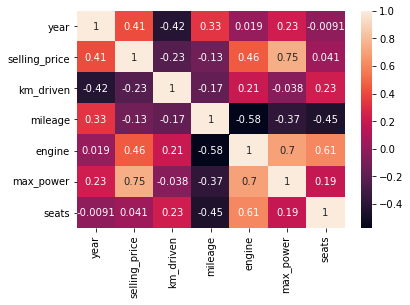

In [24]:
sns.heatmap(car_details.corr(),annot=True)

In [25]:
car_details['torque']

name
Maruti Swift Dzire VDI                     190Nm@ 2000rpm
Skoda Rapid 1.5 TDI Ambition          250Nm@ 1500-2500rpm
Honda City 2017-2020 EXi            12.7@ 2,700(kgm@ rpm)
Hyundai i20 Sportz Diesel        22.4 kgm at 1750-2750rpm
Maruti Swift VXI BSIII              11.5@ 4,500(kgm@ rpm)
                                          ...            
Hyundai i20 Magna                        113.7Nm@ 4000rpm
Hyundai Verna CRDi SX           24@ 1,900-2,750(kgm@ rpm)
Maruti Swift Dzire ZDi                     190Nm@ 2000rpm
Tata Indigo CR4                       140Nm@ 1800-3000rpm
Tata Indigo CR4                       140Nm@ 1800-3000rpm
Name: torque, Length: 8128, dtype: object

In [26]:
car['torque'].value_counts()

190Nm@ 2000rpm                 530
200Nm@ 1750rpm                 445
90Nm@ 3500rpm                  405
113Nm@ 4200rpm                 223
114Nm@ 4000rpm                 171
                              ... 
13.9 kgm at 4200 rpm             1
190Nm@ 3700rpm                   1
4.8kgm@ 3000rpm                  1
85Nm@ 3500rpm                    1
21.4@ 1,750-4,600(kgm@ rpm)      1
Name: torque, Length: 441, dtype: int64

### From this torque attribute we can say that it's extremely unorganized and the first few values have higher counts of vehicles and this count goes on gradually decreasing

## Seeing the name of all the columns of the dataframe

In [27]:
car_details.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## Finding the number of unique values of all the attributes of the 'car_details' dataframe:

In [28]:
for i in car_details.columns:
    print(f'The number of unique values in {i} is : ',car_details[i].nunique())
#    print("The number of unique values in "+ i +" is :", len(car_details[i].value_counts()) )

The number of unique values in year is :  29
The number of unique values in selling_price is :  677
The number of unique values in km_driven is :  921
The number of unique values in fuel is :  4
The number of unique values in seller_type is :  3
The number of unique values in transmission is :  2
The number of unique values in owner is :  5
The number of unique values in mileage is :  381
The number of unique values in engine is :  121
The number of unique values in max_power is :  319
The number of unique values in torque is :  441
The number of unique values in seats is :  9


In [29]:
type(pd.to_datetime('today').year)

int

## showing the unique values of the attributes

In [30]:
car_details['year'].unique()

array([2014, 2006, 2010, 2007, 2017, 2001, 2011, 2013, 2005, 2009, 2016,
       2012, 2002, 2015, 2018, 2003, 2019, 2008, 2020, 1999, 2000, 1983,
       2004, 1996, 1994, 1995, 1998, 1997, 1991], dtype=int64)

In [31]:
car_details['year'].min()

1983

In [32]:
car_details['year'].max()

2020

In [33]:
car_details['km_driven'].unique()[:10]            # showing first 10 values

array([145500, 120000, 140000, 127000,  45000, 175000,   5000,  90000,
       169000,  68000], dtype=int64)

In [34]:
car_details['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [35]:
car_details['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [36]:
car_details['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [37]:
car_details['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [38]:
car_details['mileage'].unique()[:10]                # showing first 10 values 

array([23.4 , 21.14, 17.7 , 23.  , 16.1 , 20.14, 17.3 , 23.59, 20.  ,
       19.01])

In [39]:
car_details['engine'].unique()

array([1248., 1498., 1497., 1396., 1298., 1197., 1061.,  796., 1364.,
       1399., 1461.,  993.,   nan, 1198., 1199.,  998., 1591., 2179.,
       1368., 2982., 2494., 2143., 2477., 1462., 2755., 1968., 1798.,
       1196., 1373., 1598., 1998., 1086., 1194., 1172., 1405., 1582.,
        999., 2487., 1999., 3604., 2987., 1995., 1451., 1969., 2967.,
       2497., 1797., 1991., 2362., 1493., 1599., 1341., 1794.,  799.,
       1193., 2696., 1495., 1186., 1047., 2498., 2956., 2523., 1120.,
        624., 1496., 1984., 2354.,  814.,  793., 1799.,  936., 1956.,
       1997., 1499., 1948., 2997., 2489., 2499., 2609., 2953., 1150.,
       1994., 1388., 1527., 2199.,  995., 2993., 1586., 1390.,  909.,
       2393., 3198., 1339., 2835., 2092., 1595., 2496., 1596., 1597.,
       2596., 2148., 1299., 1590., 2231., 2694., 2200., 1795., 1896.,
       1796., 1422., 1489., 2359., 2197., 2999., 1781., 2650., 1343.,
       2446., 3498., 2198., 2776., 1950.])

In [40]:
car_details['max_power'].unique()[:30]         # showing first 30 values

array([ 74.  , 103.52,  78.  ,  90.  ,  88.2 ,  81.86,  57.5 ,  37.  ,
        67.1 ,  68.1 , 108.45,  60.  ,  73.9 ,    nan,  67.  ,  82.  ,
        88.5 ,  46.3 ,  88.73,  64.1 ,  98.6 ,  88.8 ,  83.81,  83.1 ,
        47.3 ,  73.8 ,  34.2 ,  35.  ,  81.83,  40.3 ])

In [41]:
car_details['torque'].unique()[:40]            # showing first 40 values

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '12.7@ 2,700(kgm@ rpm)',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', nan, '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '200Nm@ 1750rpm', '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm',
       '114Nm@ 3500rpm', '115Nm@ 4000rpm', '69Nm@ 3500rpm',
       '172.5Nm@ 1750rpm', '6.1kgm@ 3000rpm', '114.7Nm@ 4000rpm',
       '60Nm@ 3500rpm', '90Nm@ 3500rpm', '151Nm@ 4850rpm',
       '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm', '250Nm@ 1750-2500rpm',
       '145Nm@ 4600rpm', '146Nm@ 4800rpm', '343Nm@ 1400-3400rpm',
       '200Nm@ 1400-3400rpm', '200Nm@ 1250-4000rpm',
       '400Nm@ 2000-2500rpm', '138Nm@ 4400rpm', '360Nm@ 1200-3400rpm',
       '200Nm@ 1200-3600rpm', '380Nm@ 1750-2500rpm'], dtype=object)

## The insight from 'torque' column is not much clear as the values for each instance are not in proper orientation. So we are dropping that attribute from this dataframe.

In [42]:
car_details = car_details.drop('torque', axis=1)

In [43]:
car_details.columns    # After dropping the 'torque' attribute 

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [44]:
car_details['seats'].unique()

array([ 5.,  4., nan,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [45]:
pd.to_datetime('today')

Timestamp('2021-11-15 23:53:56.098524')

In [46]:
pd.to_datetime('today').year

2021

## Adding a new column for the purpose of EDA to check the selling price variation with respect to 'year of service'

In [47]:
car_details['Year_of_service'] = car_details['year'].apply(lambda x : pd.to_datetime('today').year - x)

In [48]:
car_details[['year','Year_of_service']].head()

,year,Year_of_service
name,,
Maruti Swift Dzire VDI,2014,7
Skoda Rapid 1.5 TDI Ambition,2014,7
Honda City 2017-2020 EXi,2006,15
Hyundai i20 Sportz Diesel,2010,11
Maruti Swift VXI BSIII,2007,14


In [49]:
corr1 = car_details.corr()

In [50]:
corr1

,year,selling_price,km_driven,mileage,engine,max_power,seats,Year_of_service
year,1.000000,0.414092,-0.418006,0.329145,0.018848,0.226320,-0.009144,-1.000000
selling_price,0.414092,1.000000,-0.225534,-0.126054,0.455734,0.748489,0.041358,-0.414092
km_driven,-0.418006,-0.225534,1.000000,-0.173073,0.205914,-0.038075,0.227336,0.418006
mileage,0.329145,-0.126054,-0.173073,1.000000,-0.575831,-0.374621,-0.452085,-0.329145
engine,0.018848,0.455734,0.205914,-0.575831,1.000000,0.703975,0.610309,-0.018848
max_power,0.226320,0.748489,-0.038075,-0.374621,0.703975,1.000000,0.191999,-0.226320
seats,-0.009144,0.041358,0.227336,-0.452085,0.610309,0.191999,1.000000,0.009144
Year_of_service,-1.000000,-0.414092,0.418006,-0.329145,-0.018848,-0.226320,0.009144,1.000000


## Making Box Plot of the numeric attributes to check if there is any outliers

## Box plot of 'max_power' attribute:

<AxesSubplot:ylabel='max_power'>

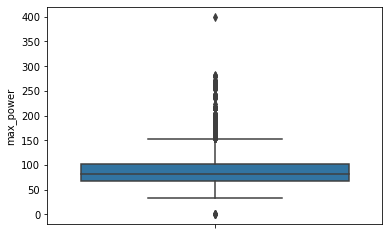

In [51]:
sns.boxplot(y='max_power', data=car_details)

<AxesSubplot:xlabel='year', ylabel='max_power'>

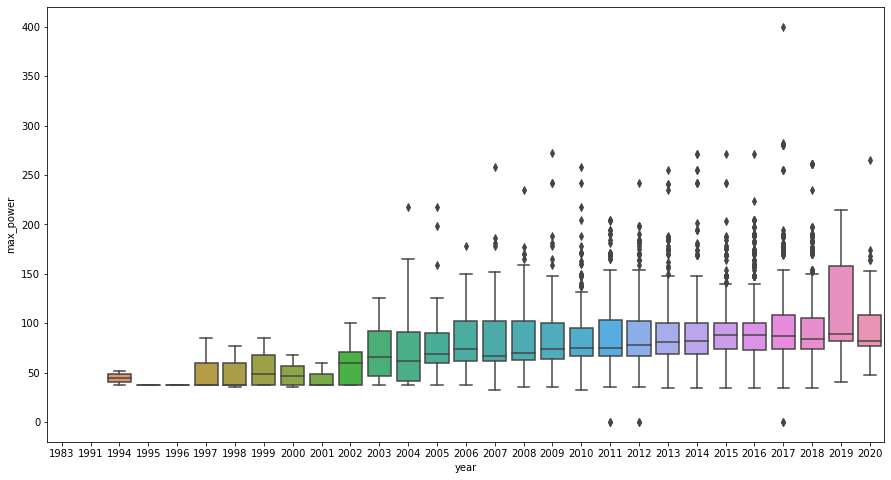

In [52]:
plt.figure(figsize=(15,8))
sns.boxplot(x='year', y='max_power',data=car_details)

## Box plot of 'engine' attribute:

<AxesSubplot:ylabel='engine'>

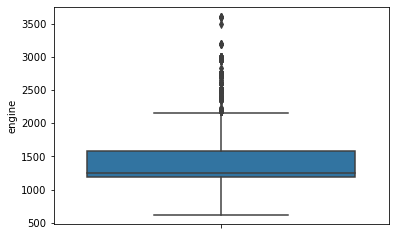

In [53]:
sns.boxplot(y='engine', data=car_details)

## Box plot of 'seats' attribute:

<AxesSubplot:ylabel='seats'>

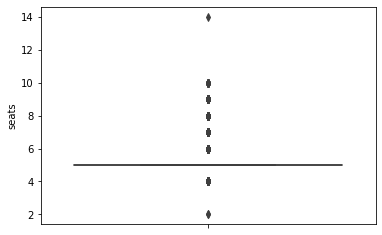

In [54]:
sns.boxplot(y='seats', data=car_details)

## Box plot of 'mileage' attribute:

<AxesSubplot:ylabel='mileage'>

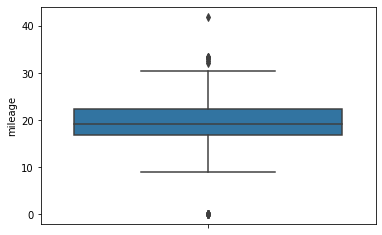

In [55]:
sns.boxplot(y='mileage', data=car_details)

<AxesSubplot:ylabel='km_driven'>

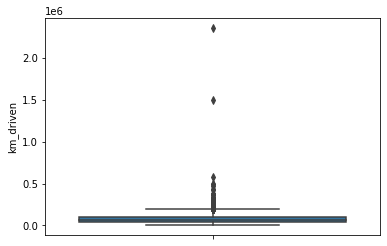

In [56]:
sns.boxplot(y='km_driven', data=car_details)

## As there are outliers present in the 'max_power','engine','mileage','seats' attribute so we have to impute its null values using the 'median' instead of 'mean' as 'mean' is influenced by outliers.

## Statistical summary for the object type attributes

In [57]:
car_details.describe(include=object)

,fuel,seller_type,transmission,owner
count,8128,8128,8128,8128
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,4402,6766,7078,5289


In [58]:
car_details['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

## Fuel

<AxesSubplot:xlabel='fuel', ylabel='count'>

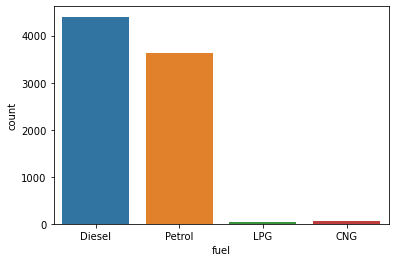

In [59]:
sns.countplot(x='fuel',data=car_details)

<AxesSubplot:xlabel='fuel'>

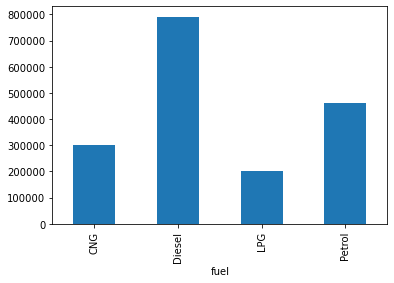

In [60]:
plt.figure()
car_details.groupby('fuel')['selling_price'].mean().plot(kind='bar')


#### As for each Fuel the mean selling price of car is varying huge so we can assume that fuel can be a good predictor or it may have a high influence on the selling price

In [61]:
#car_details['selling_price'].groupby(car_details['fuel']).std()

## Owner

<AxesSubplot:xlabel='owner', ylabel='count'>

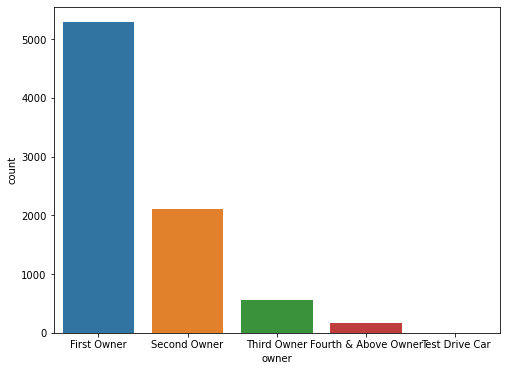

In [62]:
plt.figure(figsize=(8,6))
sns.countplot(x='owner', data=car_details)

## Checking Mean Selling price for individual group of different attributes

<AxesSubplot:xlabel='owner'>

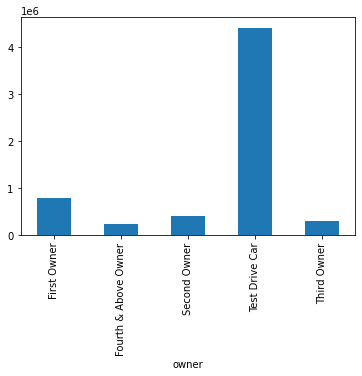

In [63]:
plt.figure()
car_details.groupby('owner')['selling_price'].mean().plot(kind='bar')

<AxesSubplot:xlabel='seller_type'>

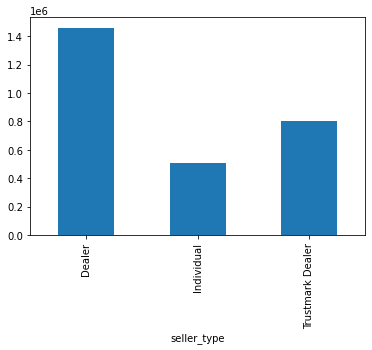

In [180]:
plt.figure()
car_details.groupby('seller_type')['selling_price'].mean().plot(kind='bar')

#### For Test Drive Car the the mean price is higher tha others

## Transmission

<AxesSubplot:xlabel='transmission', ylabel='count'>

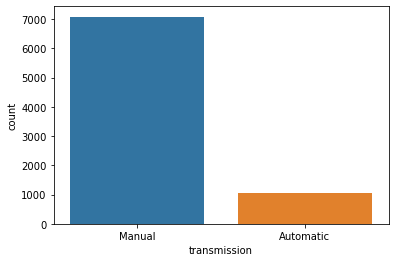

In [64]:
sns.countplot(x='transmission',data=car_details)

<AxesSubplot:xlabel='transmission'>

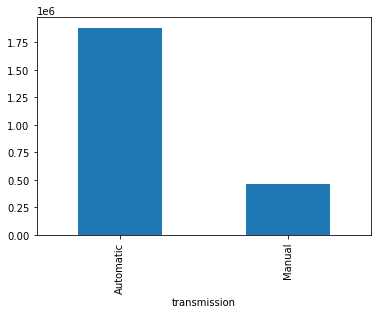

In [182]:
plt.figure()
car_details.groupby('transmission')['selling_price'].mean().plot(kind='bar')

## Seller_type

<AxesSubplot:xlabel='seller_type', ylabel='count'>

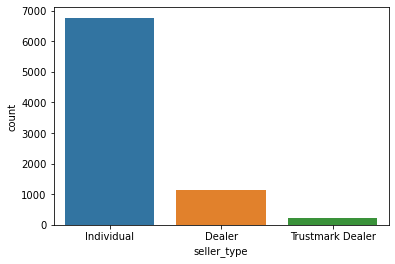

In [65]:
sns.countplot(x='seller_type',data=car_details)

In [66]:
car_details.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Year_of_service
name,,,,,,,,,,,,
Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,7
Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,7
Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,15
Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,11
Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,14


In [67]:
car_details.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,Year_of_service
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7912.000000,7907.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,91.517919,5.416719,7.195989
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,35.822499,0.959588,4.044249
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000,1.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000,4.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000,6.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.000000,10.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,38.000000


## Histogram and KDE 

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

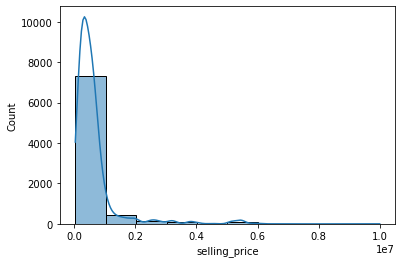

In [68]:
sns.histplot(x='selling_price',data=car_details,bins=10,kde=True)

<AxesSubplot:xlabel='mileage', ylabel='Count'>

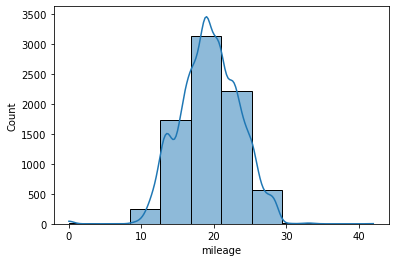

In [69]:
sns.histplot(x='mileage',data=car_details,bins=10,kde=True)

<AxesSubplot:xlabel='km_driven', ylabel='Count'>

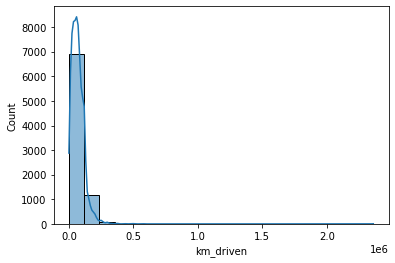

In [70]:
sns.histplot(x='km_driven',data=car_details,bins=20,kde=True)

<AxesSubplot:xlabel='engine', ylabel='Count'>

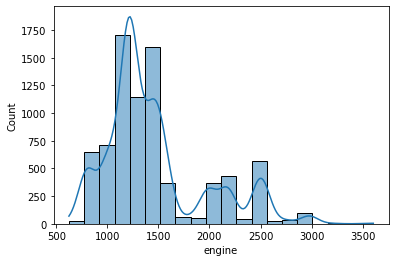

In [71]:
sns.histplot(x='engine',data=car_details,bins=20,kde=True)

<AxesSubplot:xlabel='max_power', ylabel='Count'>

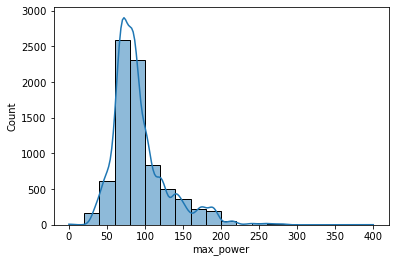

In [72]:
sns.histplot(x='max_power',data=car_details,bins=20,kde=True)

<AxesSubplot:xlabel='seats', ylabel='Count'>

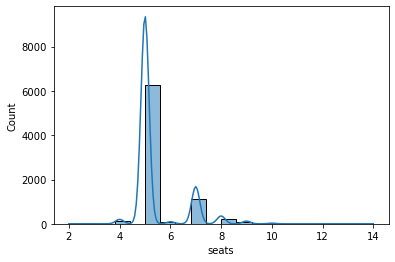

In [73]:
sns.histplot(x='seats',data=car_details,bins=20,kde=True)

<AxesSubplot:xlabel='mileage', ylabel='selling_price'>

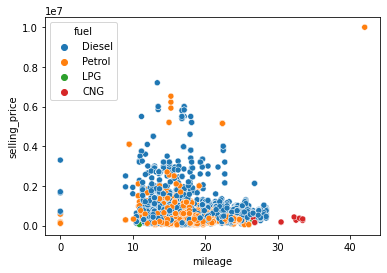

In [74]:
sns.scatterplot(x='mileage',y='selling_price',data=car_details, hue='fuel')

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

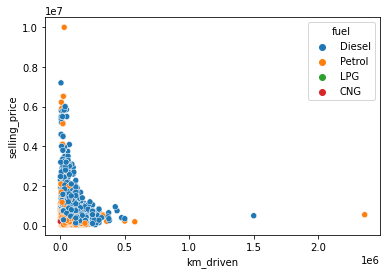

In [75]:
sns.scatterplot(x='km_driven',y='selling_price',data=car_details, hue='fuel')

<AxesSubplot:xlabel='engine', ylabel='selling_price'>

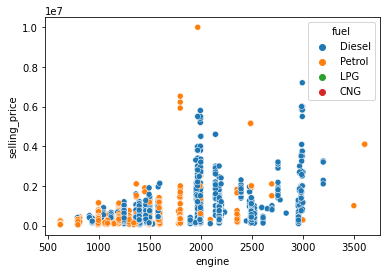

In [76]:
sns.scatterplot(x='engine',y='selling_price',data=car_details, hue='fuel')

<AxesSubplot:xlabel='max_power', ylabel='selling_price'>

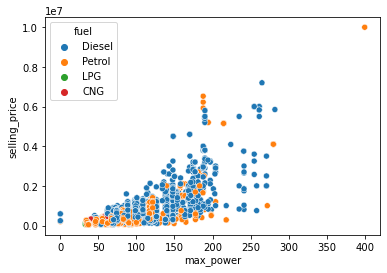

In [77]:
sns.scatterplot(x='max_power',y='selling_price',data=car_details, hue='fuel')

<AxesSubplot:xlabel='seats', ylabel='selling_price'>

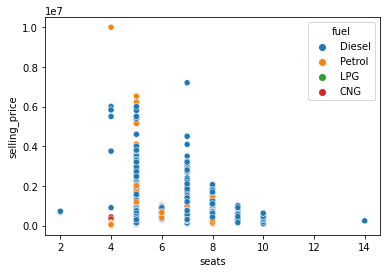

In [78]:
sns.scatterplot(x='seats',y='selling_price',data=car_details, hue='fuel')

<Figure size 720x432 with 0 Axes>

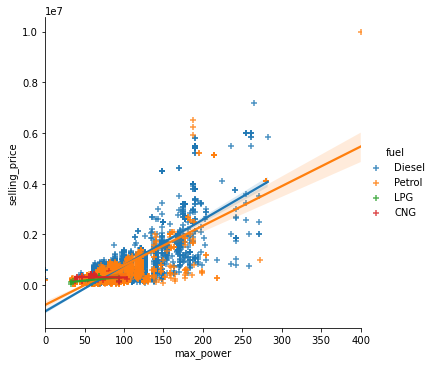

In [79]:
plt.figure(figsize=(10,6))
sns.lmplot(x='max_power',y='selling_price',markers='+',data=car_details,hue='fuel')

<Figure size 720x432 with 0 Axes>

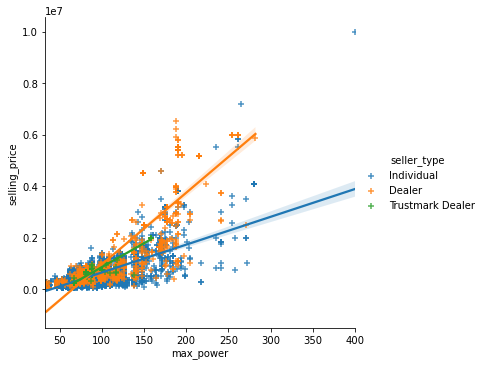

In [179]:
plt.figure(figsize=(10,6))
sns.lmplot(x='max_power',y='selling_price',markers='+',data=car_details,hue='seller_type')

<Figure size 720x432 with 0 Axes>

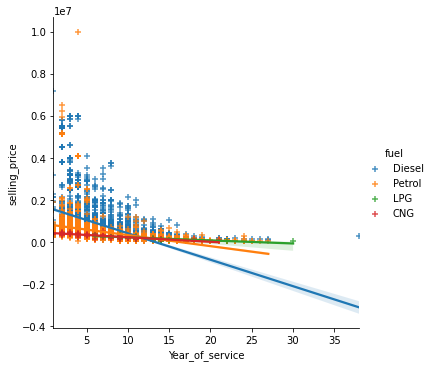

In [80]:
plt.figure(figsize=(10,6))
sns.lmplot(x='Year_of_service',y='selling_price',markers='+',data=car_details,hue='fuel')

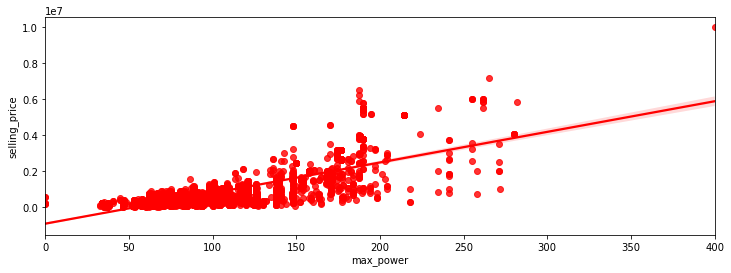

In [81]:
plt.figure(figsize=(12,4))
sns.regplot(x='max_power', y='selling_price', data=car_details,marker ='o',color='red')
plt.show()

### From the exploratory Data Analysis we can say that if any car has high value of max_power and if it's Diesel driven as well as seller type is 'Dealer' and if its transmission type is 'Automatic' then its price will be higher. More over higher the year of service lower the selling price is also noticed.

In [82]:
car_details

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Year_of_service
name,,,,,,,,,,,,
Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,7
Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,7
Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,15
Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,11
Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...
Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,8
Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,14
Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,12


In [83]:
car_details[car_details['Year_of_service']==38]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Year_of_service
name,,,,,,,,,,,,
Mahindra Willys CJ 3B 4X4,1983,300000,10000,Diesel,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,38


## 'Year_of_service' is the column made for EDA and lloking into the selling price variation for old car

In [84]:
car_details = car_details.drop('Year_of_service',axis=1)

In [85]:
car_details.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8128 entries, Maruti Swift Dzire VDI to Tata Indigo CR4
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   float64
 8   engine         7907 non-null   float64
 9   max_power      7912 non-null   float64
 10  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 891.0+ KB


In [86]:
car_details.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
name,,,,,,,,,,,
Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


## Dropping all the null values

In [87]:
car_details = car_details.dropna()

In [88]:
car_details.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, Maruti Swift Dzire VDI to Tata Indigo CR4
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7906 non-null   int64  
 1   selling_price  7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   fuel           7906 non-null   object 
 4   seller_type    7906 non-null   object 
 5   transmission   7906 non-null   object 
 6   owner          7906 non-null   object 
 7   mileage        7906 non-null   float64
 8   engine         7906 non-null   float64
 9   max_power      7906 non-null   float64
 10  seats          7906 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 741.2+ KB


In [89]:
car_details.head(10)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
name,,,,,,,,,,,
Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.50,5.0
Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,4.0
Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,5.0


In [90]:
car_details.shape

(7906, 11)

## Separating Predictor and Target attribute

In [91]:
X = car_details.drop('selling_price', axis = 1)
y = car_details['selling_price']

In [92]:
X.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
name,,,,,,,,,,
Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [93]:
y

name
Maruti Swift Dzire VDI          450000
Skoda Rapid 1.5 TDI Ambition    370000
Honda City 2017-2020 EXi        158000
Hyundai i20 Sportz Diesel       225000
Maruti Swift VXI BSIII          130000
                                 ...  
Hyundai i20 Magna               320000
Hyundai Verna CRDi SX           135000
Maruti Swift Dzire ZDi          382000
Tata Indigo CR4                 290000
Tata Indigo CR4                 290000
Name: selling_price, Length: 7906, dtype: int64

## Doing the train-test split

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=42)

In [96]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5534, 10), (2372, 10), (5534,), (2372,))

In [97]:
len(X_train)/len(car_details)

0.6999747027573995

In [98]:
len(X_test)/len(car_details)

0.3000252972426006

In [99]:
X_train.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
name,,,,,,,,,,
Hyundai i20 Active 1.4 SX,2015,108000,Diesel,Individual,Manual,First Owner,21.19,1396.0,88.73,5.0
Toyota Corolla Altis JS MT,2015,50000,Petrol,Individual,Manual,First Owner,14.28,1798.0,138.03,5.0
Tata Manza Club Class Quadrajet90 LS,2013,50000,Diesel,Individual,Manual,First Owner,21.02,1248.0,88.80,5.0
Tata Indigo CR4,2013,100000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0
Mahindra Bolero Power Plus ZLX,2019,14000,Diesel,Individual,Manual,First Owner,16.50,1493.0,70.00,7.0


In [100]:
X_test.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
name,,,,,,,,,,
Maruti Swift VDI,2014,68000,Diesel,Dealer,Manual,First Owner,22.90,1248.0,74.0,5.0
Maruti Swift Dzire VDI,2015,110000,Diesel,Individual,Manual,First Owner,26.59,1248.0,74.0,5.0
Tata Indica Vista TDI LX,2012,185000,Diesel,Individual,Manual,Second Owner,19.40,1405.0,70.0,5.0
Toyota Corolla Altis Diesel D4DJ,2012,90000,Diesel,Individual,Manual,Fourth & Above Owner,21.43,1364.0,87.2,5.0
Maruti Ignis 1.2 AMT Zeta BSIV,2018,15000,Petrol,Individual,Automatic,First Owner,20.89,1197.0,81.8,5.0


In [101]:
y_train

name
Hyundai i20 Active 1.4 SX                  600000
Toyota Corolla Altis JS MT                1100000
Tata Manza Club Class Quadrajet90 LS       250000
Tata Indigo CR4                            250000
Mahindra Bolero Power Plus ZLX             740000
                                           ...   
Maruti Baleno Alpha 1.2                    711000
Honda Brio 1.2 VX MT                       411000
Hyundai Accent GLX                         110000
BMW 3 Series 320d Corporate Edition        900000
Hyundai Elite i20 Asta Option CVT BSIV     800000
Name: selling_price, Length: 5534, dtype: int64

In [102]:
y_test

name
Maruti Swift VDI                               501000
Maruti Swift Dzire VDI                         440000
Tata Indica Vista TDI LX                       140000
Toyota Corolla Altis Diesel D4DJ               476999
Maruti Ignis 1.2 AMT Zeta BSIV                 620000
                                                ...  
Hyundai EON Era Plus                           220000
Chevrolet Beat Diesel LT                       175000
Tata Tigor 1.2 Revotron XZA                    525000
Mahindra Scorpio 1.99 S4 Plus                  650000
Volkswagen Ameo 1.5 TDI Highline Plus 16 AT    650000
Name: selling_price, Length: 2372, dtype: int64

## Separating Numerical and categorical attributes in the train set

In [103]:
X_train_num = X_train.drop(['fuel','seller_type','transmission','owner'],axis = 1)
X_train_cat = X_train[['fuel','seller_type','transmission','owner']]

In [104]:
X_train_num.head()

,year,km_driven,mileage,engine,max_power,seats
name,,,,,,
Hyundai i20 Active 1.4 SX,2015,108000,21.19,1396.0,88.73,5.0
Toyota Corolla Altis JS MT,2015,50000,14.28,1798.0,138.03,5.0
Tata Manza Club Class Quadrajet90 LS,2013,50000,21.02,1248.0,88.80,5.0
Tata Indigo CR4,2013,100000,23.57,1396.0,70.00,5.0
Mahindra Bolero Power Plus ZLX,2019,14000,16.50,1493.0,70.00,7.0


In [105]:
X_train_cat.head()

,fuel,seller_type,transmission,owner
name,,,,
Hyundai i20 Active 1.4 SX,Diesel,Individual,Manual,First Owner
Toyota Corolla Altis JS MT,Petrol,Individual,Manual,First Owner
Tata Manza Club Class Quadrajet90 LS,Diesel,Individual,Manual,First Owner
Tata Indigo CR4,Diesel,Individual,Manual,First Owner
Mahindra Bolero Power Plus ZLX,Diesel,Individual,Manual,First Owner


In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
scaler = StandardScaler()

In [108]:
X_train_num_scaled = scaler.fit_transform(X_train_num)

In [109]:
X_train_num_scaled

array([[ 0.2559592 ,  0.74734001,  0.43321151, -0.13003947, -0.08307242,
        -0.43635222],
       [ 0.2559592 , -0.36262845, -1.26173661,  0.65817992,  1.27772334,
        -0.43635222],
       [-0.25651483, -0.36262845,  0.39151236, -0.42022969, -0.08114025,
        -0.43635222],
       ...,
       [-2.81888502,  0.40286704, -1.52664891,  0.06407426,  0.06239196,
        -0.43635222],
       [-0.51275185,  1.64679721, -0.82266901,  1.04444664,  2.46379624,
        -1.48261443],
       [ 1.02467026, -0.84106313, -0.49643442, -0.52022767, -0.27270055,
        -0.43635222]])

In [110]:
X_train_num_scaled.shape

(5534, 6)

In [111]:
X_train_cat.columns

Index(['fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [112]:
from sklearn.preprocessing import OneHotEncoder

In [113]:
train_hot_encoder = OneHotEncoder(sparse = False)

In [114]:
X_train_cat_hot_encoded = train_hot_encoder.fit_transform(X_train_cat)

In [115]:
train_hot_encoder.categories_

[array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype=object),
 array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object),
 array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
        'Test Drive Car', 'Third Owner'], dtype=object)]

In [116]:
X_train_cat_hot_encoded.shape

(5534, 14)

In [117]:
X_train_cat_hot_encoded[:5] 

array([[0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.]])

In [118]:
X_train_final = np.c_[X_train_num_scaled, X_train_cat_hot_encoded]

In [119]:
X_train_final

array([[ 0.2559592 ,  0.74734001,  0.43321151, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2559592 , -0.36262845, -1.26173661, ...,  0.        ,
         0.        ,  0.        ],
       [-0.25651483, -0.36262845,  0.39151236, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-2.81888502,  0.40286704, -1.52664891, ...,  1.        ,
         0.        ,  0.        ],
       [-0.51275185,  1.64679721, -0.82266901, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.02467026, -0.84106313, -0.49643442, ...,  0.        ,
         0.        ,  0.        ]])

In [120]:
X_train_final.shape

(5534, 20)

In [121]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5534 entries, Hyundai i20 Active 1.4 SX to Hyundai Elite i20 Asta Option CVT BSIV
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5534 non-null   int64  
 1   km_driven     5534 non-null   int64  
 2   fuel          5534 non-null   object 
 3   seller_type   5534 non-null   object 
 4   transmission  5534 non-null   object 
 5   owner         5534 non-null   object 
 6   mileage       5534 non-null   float64
 7   engine        5534 non-null   float64
 8   max_power     5534 non-null   float64
 9   seats         5534 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 475.6+ KB


# Preprocessing on Test Dataset

In [122]:
X_test_num = X_test.drop(['fuel','seller_type','transmission','owner'],axis = 1)
X_test_cat = X_test[['fuel','seller_type','transmission','owner']]

In [123]:
X_test_num.head()

,year,km_driven,mileage,engine,max_power,seats
name,,,,,,
Maruti Swift VDI,2014,68000,22.90,1248.0,74.0,5.0
Maruti Swift Dzire VDI,2015,110000,26.59,1248.0,74.0,5.0
Tata Indica Vista TDI LX,2012,185000,19.40,1405.0,70.0,5.0
Toyota Corolla Altis Diesel D4DJ,2012,90000,21.43,1364.0,87.2,5.0
Maruti Ignis 1.2 AMT Zeta BSIV,2018,15000,20.89,1197.0,81.8,5.0


In [124]:
X_test_cat.head()

,fuel,seller_type,transmission,owner
name,,,,
Maruti Swift VDI,Diesel,Dealer,Manual,First Owner
Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
Tata Indica Vista TDI LX,Diesel,Individual,Manual,Second Owner
Toyota Corolla Altis Diesel D4DJ,Diesel,Individual,Manual,Fourth & Above Owner
Maruti Ignis 1.2 AMT Zeta BSIV,Petrol,Individual,Automatic,First Owner


In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
scaler = StandardScaler()

In [127]:
X_test_num_scaled = scaler.fit_transform(X_test_num)

In [128]:
X_test_num_scaled

array([[ 0.01487234, -0.0264254 ,  0.88585628, -0.4135675 , -0.49822435,
        -0.42901927],
       [ 0.28011432,  0.6083219 ,  1.8226115 , -0.4135675 , -0.49822435,
        -0.42901927],
       [-0.51561163,  1.74179922, -0.00266492, -0.09257687, -0.61387406,
        -0.42901927],
       ...,
       [ 0.81059829, -0.7560372 ,  0.22581196, -0.51374929, -0.2091001 ,
        -0.42901927],
       [ 0.28011432,  1.21284314, -1.01811773,  1.11778269,  0.83174722,
         1.63934192],
       [ 1.07584027,  0.18515703,  0.58883634,  0.09756407,  0.50272382,
        -0.42901927]])

In [129]:
X_test_num_scaled.shape

(2372, 6)

In [130]:
from sklearn.preprocessing import OneHotEncoder

In [131]:
test_hot_encoder = OneHotEncoder(sparse = False)

In [132]:
X_test_cat_hot_encoded = test_hot_encoder.fit_transform(X_test_cat)

In [133]:
X_test_cat_hot_encoded.shape

(2372, 14)

In [134]:
test_hot_encoder.categories_

[array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype=object),
 array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object),
 array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
        'Test Drive Car', 'Third Owner'], dtype=object)]

In [135]:
X_test_cat_hot_encoded[:5]

array([[0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.]])

In [136]:
X_test_final = np.c_[X_test_num_scaled, X_test_cat_hot_encoded]

## Checking the shape of both train and test set

In [137]:
X_test_final.shape

(2372, 20)

In [138]:
X_train_final.shape

(5534, 20)

# Applying the Model

# Linear Regression

In [139]:
from sklearn.linear_model import LinearRegression

In [140]:
lin_reg = LinearRegression()

In [141]:
lin_reg.fit(X_train_final, y_train)

LinearRegression()

In [142]:
y_train_pred = lin_reg.predict(X_train_final)

In [143]:
type(y_train_pred)

numpy.ndarray

In [144]:
y_train_pred[:5]

array([ 569863.71721819, 1163715.45831202,  572281.00705484,
        315717.43886464,  478449.242323  ])

In [145]:
from sklearn.metrics import mean_squared_error

In [146]:
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_train_pred))

Mean squared error: 209139228118.02


In [147]:
#RMSE_train
print("Root Mean Squared error: %.2f" % np.sqrt(mean_squared_error(y_train, y_train_pred)))

Root Mean Squared error: 457317.43


In [148]:
from sklearn.metrics import r2_score

In [149]:
r2_score(y_train, y_train_pred)

0.6820568349130687

In [150]:
y_test_pred = lin_reg.predict(X_test_final)

In [151]:
#MSE_test = mean_squared_error(y_test, y_test_pred)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_pred))

Mean squared error: 207424441827.76


In [152]:
#rmse_test = np.sqrt(MSE_test)
print("Root Mean Squared error: %.2f" %np.sqrt(mean_squared_error(y_test, y_test_pred)))

Root Mean Squared error: 455438.74


In [153]:
r2_score(y_test, y_test_pred)

0.6909748907533365

In [154]:
lin_reg.coef_

array([ 121117.55267416,  -73092.86534928,   50729.77767081,
         53064.68145588,  450456.84347696,  -31489.02358007,
        -30413.80832042,  -41785.21214024,  170085.29842695,
        -97886.27796629,  182215.64830711,  -41900.98278705,
       -140314.66552006,  221876.96820536, -221876.96820536,
       -448989.89767694, -406872.47471522, -501377.09445012,
       1843802.04417499, -486562.57733272])

In [155]:
lin_reg.intercept_

1356644.8615844562

# KNN

In [156]:
from sklearn.neighbors import KNeighborsRegressor as KNR

In [157]:
model = KNR(n_neighbors = 3)

In [158]:
model.fit(X_train_final, y_train)

KNeighborsRegressor(n_neighbors=3)

In [159]:
y_train_pred_KNR = model.predict(X_train_final)

In [160]:
y_train_pred_KNR

array([ 576666.66666667, 1025000.        ,  295000.        , ...,
         90000.        , 1166666.66666667,  690000.        ])

In [161]:
y_train[:5]

name
Hyundai i20 Active 1.4 SX                600000
Toyota Corolla Altis JS MT              1100000
Tata Manza Club Class Quadrajet90 LS     250000
Tata Indigo CR4                          250000
Mahindra Bolero Power Plus ZLX           740000
Name: selling_price, dtype: int64

In [162]:
y_test_pred_KNR = model.predict(X_test_final)

In [163]:
y_test_pred_KNR

array([466333.        , 540000.        , 176666.66666667, ...,
       523333.33333333, 850000.        , 830000.        ])

In [164]:
y_test[:5]

name
Maruti Swift VDI                    501000
Maruti Swift Dzire VDI              440000
Tata Indica Vista TDI LX            140000
Toyota Corolla Altis Diesel D4DJ    476999
Maruti Ignis 1.2 AMT Zeta BSIV      620000
Name: selling_price, dtype: int64

In [165]:
train_rmse_error_KNR = np.sqrt(mean_squared_error(y_train, y_train_pred_KNR))

In [166]:
train_rmse_error_KNR

132078.10589169015

In [167]:
r2_score(y_train, y_train_pred_KNR)

0.973479869501801

In [168]:
test_rmse_error_KNR = np.sqrt(mean_squared_error(y_test, y_test_pred_KNR))

In [169]:
test_rmse_error_KNR

183749.40020073904

In [170]:
r2_score(y_test, y_test_pred_KNR)

0.9496979483536007

## Trying different value of K to check which value gives lowest RMSE

In [176]:
rmse_val_list = [] #to store rmse values for different k
r2_list = []

for K in range(20):
    K = K+1
    model = KNR(n_neighbors = K)

    model.fit(X_train_final, y_train)  #fit the model
    y_pred = model.predict(X_test_final) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test, y_pred)) #calculate rmse
    r2 = r2_score(y_test, y_pred)
    print('RMSE value for k= ' , K , 'is:', error)
    print('R2 score for value k= ', K ,'is:', r2)
    
    rmse_val_list.append(error) #store rmse values
    r2_list.append(r2)
    
print("The maximum R2 score we get is", max(r2_list))    
print("The minimum error we get is ", min(rmse_val_list))
print("The corresponding K value is ", 1+rmse_val_list.index(min(rmse_val_list)))

RMSE value for k=  1 is: 210629.3593934926
R2 score for value k=  1 is: 0.9339045365195718
RMSE value for k=  2 is: 195480.53396070324
R2 score for value k=  2 is: 0.9430700408967501
RMSE value for k=  3 is: 183749.40020073904
R2 score for value k=  3 is: 0.9496979483536007
RMSE value for k=  4 is: 175903.4338704338
R2 score for value k=  4 is: 0.9539019585967933
RMSE value for k=  5 is: 177946.23265116254
R2 score for value k=  5 is: 0.9528250515491132
RMSE value for k=  6 is: 184263.67993871786
R2 score for value k=  6 is: 0.9494159825068349
RMSE value for k=  7 is: 187801.16876607345
R2 score for value k=  7 is: 0.9474551181294429
RMSE value for k=  8 is: 190329.72834157484
R2 score for value k=  8 is: 0.9460306616202631
RMSE value for k=  9 is: 198907.49319881978
R2 score for value k=  9 is: 0.9410564719753381
RMSE value for k=  10 is: 204839.1024020534
R2 score for value k=  10 is: 0.9374885508728019
RMSE value for k=  11 is: 208993.81560096715
R2 score for value k=  11 is: 0.9349

## For Test Dataset we are taking K value as the square root of Total Test Dataset and checking which K value gives lowest RMSE 

In [172]:
rmse_val_list = list() #to store rmse values for different k
rmse_val_df = pd.DataFrame(columns=["K","Error"])

iter_len = len(X_test_final)
iter_size = round(np.sqrt(iter_len))

for K in range(iter_size):
    K = K+1
    model = KNR(n_neighbors = K)

    model.fit(X_train_final, y_train)  #fit the model
    y_pred = model.predict(X_test_final) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test, y_pred)) #calculate rmse
    
    
    rmse_val_list.append(error) #store rmse values
    rmse_val_df = rmse_val_df.append({'K':K,'Error':error}, ignore_index=True) # Appending the value of k and error to the dataframe
    
print("The minimum error we get is ", min(rmse_val_list))
print("The corresponding K value is ", 1+rmse_val_list.index(min(rmse_val_list)))


The minimum error we get is  175903.4338704338
The corresponding K value is  4


In [178]:
rmse_df = pd.DataFrame(rmse_val_df).set_index('K')
rmse_df[:10]

,Error
K,
1.0,210629.359393
2.0,195480.533961
3.0,183749.400201
4.0,175903.433870
5.0,177946.232651
6.0,184263.679939
7.0,187801.168766
8.0,190329.728342
9.0,198907.493199


<AxesSubplot:xlabel='K'>

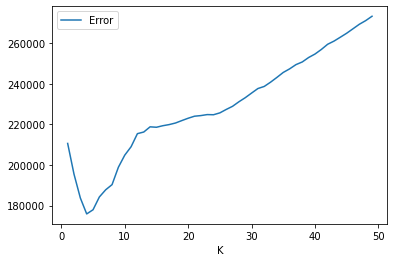

In [174]:
rmse_df.plot()

## After k=4 the error value is gradually increasing. So we will take the value of k as 4. So we can say that if any new instance has an entry to the dataset then for predicting its selling price we have to take 4 nearest neighbors